In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, "/cellar/users/mpagadal/Programs/anaconda3/lib/python3.7/site-packages")
import lifelines


In [2]:
### STATS ###
import statsmodels.stats.multitest as multi
from matplotlib.collections import PatchCollection

In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
import scipy.stats

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

## Get survival information

In [7]:
def make_df(surv,surv_type,raw):
    #get survival dataframe
    surv=pd.read_csv(surv,index_col=0)
    surv=surv.rename(columns={"bcr_patient_barcode":"FID"})
    #get genotypes
    snps=pd.read_csv(raw,delimiter=" ")
    cols=[x for x in snps.columns if x not in ["IID","PAT","MAT","SEX","PHENOTYPE"]]
    snps=snps[cols]
    #combine dataframes
    full_surv=pd.merge(surv[["FID",surv_type,surv_type+".time"]],snps,on="FID")
    print(full_surv.shape)
    full_surv=full_surv[full_surv[surv_type+".time"]<1825]
    return(full_surv)

In [8]:
os_surv=make_df("/cellar/users/mpagadal/Data/resources/from-labmembers/andrea/Liu2018.TCGA_survival.csv","OS","/nrnb/users/mpagadal/tcga-genotypes/germline-immune/hla.snp.raw")

(8183, 108)


In [9]:
os_surv["OS"].value_counts()

0.0    4373
1.0    2374
Name: OS, dtype: int64

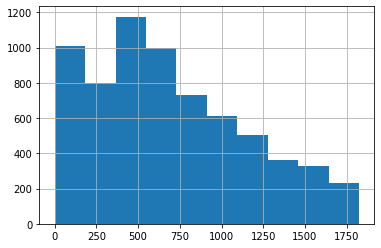

In [10]:
os_surv["OS.time"].hist()

## Map to cancer types

In [11]:
# map to cancer type
canc = pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/birdseed-processing/gtype.meta", delimiter="\t", header=None)
mp = canc.set_index(2)[0].to_dict()
os_surv["cancer"]=os_surv["FID"].map(mp)

In [12]:
# make list of cancer types
cancers=os_surv["cancer"].unique().tolist()

## Make combo of 2 HLA-A variants

In [13]:
os_surv["6:29933439:T:C_T"]=os_surv["6:29933439:T:C_C"].map({2:0,1:1,0:2})

In [14]:
combo=[]

for i,row in os_surv.iterrows():
    if (row["6:29933439:T:C_T"]>0) & (row["6:29910358:G:C_C"]>0):
        combo.append(2)
    elif row["6:29933439:T:C_T"]>0:
        combo.append(1)
    elif row["6:29910358:G:C_C"]>0:
        combo.append(1)
    else:
        combo.append(0)
        
os_surv["combo"]=combo  

## Map to RNA

In [15]:
firebrowse=pd.read_csv("/cellar/users/mpagadal/Data2/projects/germline-immune/discovery/phenotypes/processed_phenos/firebrowse/tumor/pheno_all_zcancer",delimiter="\t")

In [16]:
os_surv=pd.merge(os_surv,firebrowse[["FID","HLA.A"]], on="FID",how="left")

## Run Kaplan-Meier analysis

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-pa

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-pa

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-pa

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-pa

UCS


/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


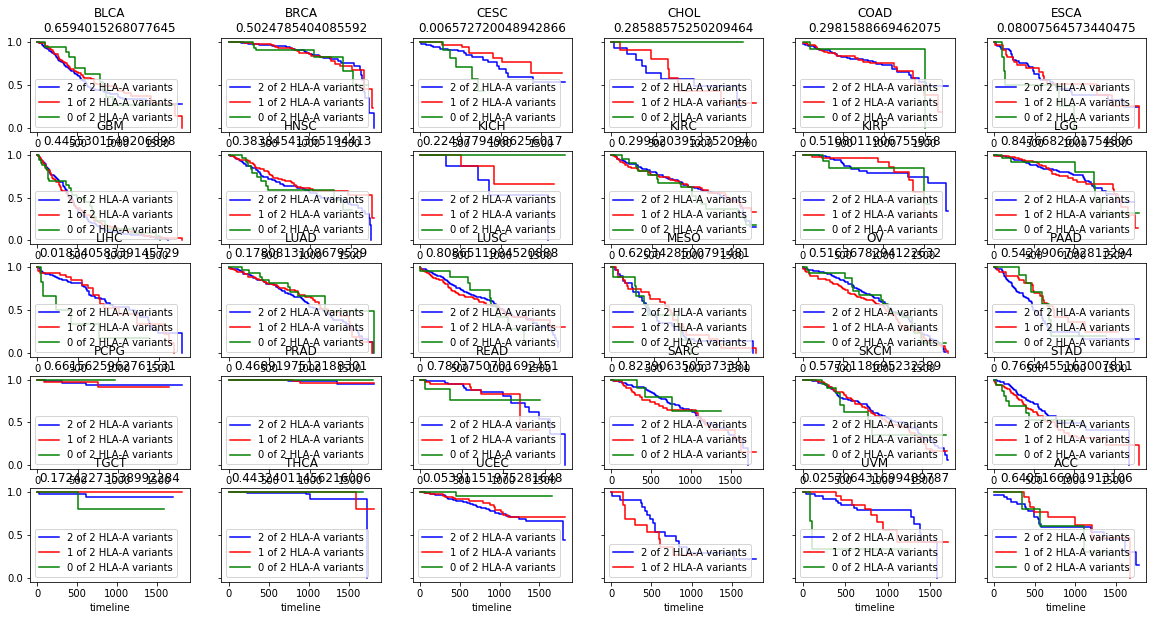

In [17]:

fig, axs = plt.subplots(5, 6, sharey=True, figsize=(20, 10))
axli = axs.flatten()

cancer=[]
logrank=[]

for i,x in enumerate(cancers):
    try:
        surv_type="OS"
        surv_df_canc=os_surv[os_surv["cancer"]==x]
        groups = surv_df_canc["combo"]
    
        ix0 = (groups == 0)
        ix1 = (groups == 1)
        ix2 = (groups == 2)
        ix01 = (groups > 1)

        results = logrank_test(surv_df_canc[surv_type+'.time'][ix0], surv_df_canc[surv_type+'.time'][ix01],event_observed_A=surv_df_canc[surv_type][ix0], event_observed_B=surv_df_canc[surv_type][ix01], alpha=.95) 
        cancer.append(x)
        logrank.append(results.p_value)
        kmf = KaplanMeierFitter()
        kmf.fit(surv_df_canc[surv_type+'.time'][ix2], surv_df_canc[surv_type][ix2],label="2 of 2 HLA-A variants")
        kmf.plot(ax=axli[i-1],color='blue', ci_show=False)
    
        kmf.fit(surv_df_canc[surv_type+'.time'][ix1], surv_df_canc[surv_type][ix1],label="1 of 2 HLA-A variants")
        kmf.plot(ax=axli[i-1], color='red', ci_show=False)
    
        kmf.fit(surv_df_canc[surv_type+'.time'][ix0], surv_df_canc[surv_type][ix0],label="0 of 2 HLA-A variants")
        kmf.plot(ax=axli[i-1], color='green', ci_show=False)
        axli[i-1].set_title("{}\n{}".format(x,results.p_value))
    except:
        print(x)


fig.savefig("os.survival.hla.a.variants.pdf")

        

In [18]:
df=pd.DataFrame({"cancer":cancer,"logrank":logrank})

In [20]:
df.sort_values(by="logrank")

,cancer,logrank
3,CESC,0.006573
13,LIHC,0.018341
29,UVM,0.025706
27,UCEC,0.053912
6,ESCA,0.080076
25,TGCT,0.172423
14,LUAD,0.178081
9,KICH,0.224978
4,CHOL,0.285886
5,COAD,0.298159


In [228]:
os=run_surv(os_surv,"OS",rsid_lst,cancers)

### Filter for curves with at least 1 patient and frequency > 1%

In [229]:
os["sum"]=os["min"]+os["maj"]
os["freq"]=os["min"]/os["sum"]
os_filt=os[(os["freq"]>.01)&(os["min"]>1)]

In [230]:
def fdr(df,P):
    probabilities = df[P].to_numpy()
    report = multi.multipletests(probabilities,
                alpha=0.05,
                method="fdr_bh",
                is_sorted=False,
            )
    discoveries = report[1]
    df["fdr"]=discoveries
    df["fdr"]=pd.to_numeric(df["fdr"])
    df["-log10(fdr)"]=-np.log10(df["fdr"])
    
    return(df)

In [231]:
os_fdr=pd.DataFrame()

for x in os_filt["cancer"].unique().tolist():
    os_cancer=os_filt[os_filt["cancer"]==x]
    os_fdr=os_fdr.append(fdr(os_cancer,"os.time"))

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [232]:
os_sig=os_fdr[os_fdr["-log10(fdr)"]>1]
os_sig["snps"]=os_sig["snps"].str.split("_").str[0]

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [233]:
os_sig

,snps,os.time,cancer,min,maj,sum,freq,fdr,-log10(fdr)
111,6:29752808:A:G,3.805249e-14,BLCA,3,284,287,0.010453,2.968094e-12,11.527522
1050,6:26364628:A:C,4.337832e-04,KIRC,4,289,293,0.013652,3.426887e-02,1.465100
1946,6:32422191:G:A,1.922326e-04,PAAD,11,139,150,0.073333,1.441744e-02,1.841112
2175,6:32615945:A:T,1.175012e-03,PRAD,7,332,339,0.020649,9.282592e-02,1.032331
2251,6:31586094:T:C,5.421047e-04,READ,2,128,130,0.015385,4.011575e-02,1.396685
2775,6:31561639:G:A,7.789553e-04,THCA,7,282,289,0.024221,6.309538e-02,1.200002


## Annotate snps with phenotypes

In [234]:
snps=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/snp-tables/immune-microenvironment-hla.tsv",delimiter="\t")
snps=snps.rename(columns={"snp":"snps"})
os_sig_annot=pd.merge(os_sig,snps[["snps","file"]],on="snps",how="left")

In [235]:

def run_surv_plot(df_annot,surv_df,surv_type,out):
    for i,row in df_annot.iterrows():
        try:
            surv_df_canc=surv_df[surv_df["cancer"]==row["cancer"]]
            x=[x for x in surv_df.columns if row["snps"] in x][0]
            rs=x.rsplit(":",2)[0]
        
            allele1=x.split(":")[2]
            allele2=str(x.split("_")[0]).split(":")[3]
            minor=x.split("_")[1]
            if allele1 == minor:
                major=allele2
            else:
                major=allele1
            
            fig=plt.figure(figsize=(12,5))
            ax1 = plt.subplot(1,2,1)
            
            groups = surv_df_canc[x]
            ix = (groups == 2)

            kmf = KaplanMeierFitter()
            kmf.fit(surv_df_canc[surv_type+'.time'][ix], surv_df_canc[surv_type][ix],label=minor+minor)
            kmf.plot(color='blue', ci_show=False, ax=ax1)
    
            kmf.fit(surv_df_canc[surv_type+'.time'][~ix], surv_df_canc[surv_type][~ix],label=major+minor+"/"+major+major)
            kmf.plot(ax=ax1, color='red', ci_show=False)

            results = logrank_test(surv_df_canc[surv_type+'.time'][ix], surv_df_canc[surv_type+'.time'][~ix],event_observed_A=surv_df_canc[surv_type][ix], event_observed_B=surv_df_canc[surv_type][~ix], alpha=.95) 
            plt.title('{}.{}\n{}\nLog-rank test: p<{:.3}'.format(x,row["file"],row["cancer"],results.p_value))

            plt.xlabel('Months')
            plt.ylabel(surv_type+' time (days)')
            plt.legend(frameon=False)

            plt.tight_layout()

            plt.savefig(out+x+'.'+row["file"]+"."+row["cancer"]+'.pdf')
            plt.close()
        
        except:
            pass

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-pa

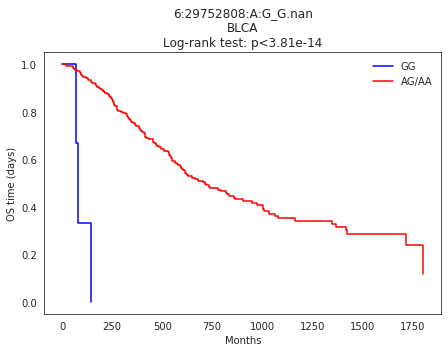

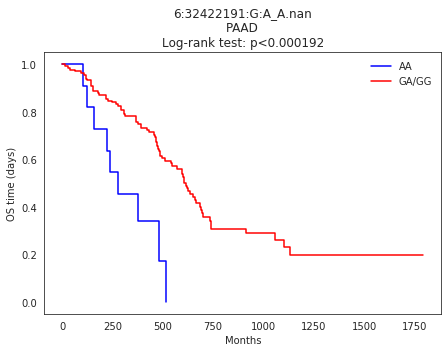

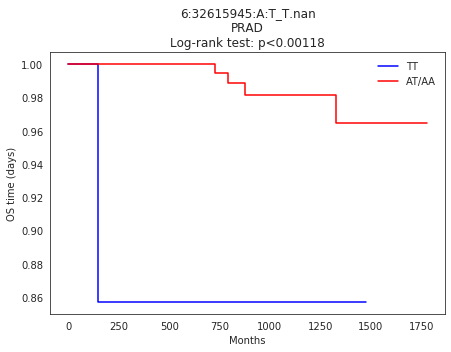

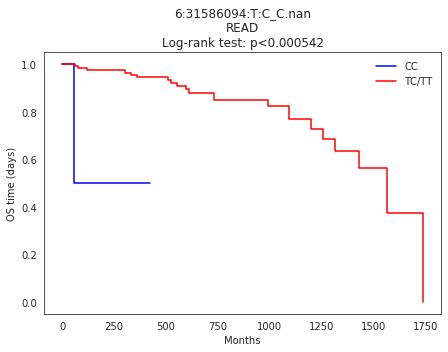

In [236]:
run_surv_plot(os_sig_annot,os_surv,"OS","../plots/kaplan-plots/")

## Progression-free survival

In [237]:
pfi_surv=make_df("/cellar/users/mpagadal/Data/resources/from-labmembers/andrea/Liu2018.TCGA_survival.csv","PFI","/nrnb/users/mpagadal/tcga-genotypes/germline-immune/hla.snp.raw")

(8183, 108)


In [238]:
pfi_surv["cancer"]=pfi_surv["FID"].map(mp)

In [239]:
rsid_lst=pfi_surv.columns[3:-1]

In [240]:
# make list of cancer types
cancers=pfi_surv["cancer"].unique().tolist()

In [241]:
pfi=run_surv(pfi_surv,"PFI",rsid_lst,cancers)

In [201]:
pfi["sum"]=pfi["min"]+pfi["maj"]
pfi["freq"]=pfi["min"]/pfi["sum"]
pfi_filt=pfi[(pfi["freq"]>.01)&(pfi["min"]>1)]

In [202]:
pfi_fdr=pd.DataFrame()

for x in pfi_filt["cancer"].unique().tolist():
    pfi_cancer=pfi_filt[pfi_filt["cancer"]==x]
    pfi_fdr=pfi_fdr.append(fdr(pfi_cancer,"os.time"))

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [203]:
pfi_sig=pfi_fdr[pfi_fdr["-log10(fdr)"]>1]
pfi_sig["snps"]=pfi_sig["snps"].str.split("_").str[0]

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [204]:
pfi_sig.shape

(19, 9)

In [205]:
pfi_sig.head()

,snps,os.time,cancer,min,maj,sum,freq,fdr,-log10(fdr)
25,6:31238053:C:G,0.000910,ACC,7,57,64,0.109375,0.033201,1.478851
26,6:31239205:T:C,0.000910,ACC,7,57,64,0.109375,0.033201,1.478851
111,6:29752808:A:G,0.000004,BLCA,3,295,298,0.010067,0.000303,3.518637
885,6:31561639:G:A,0.003839,HNSC,7,375,382,0.018325,0.080355,1.094984
907,6:32596635:A:C,0.003132,HNSC,9,373,382,0.023560,0.080355,1.094984


In [206]:
pfi_sig_annot=pd.merge(pfi_sig,snps[["snps","file"]],on="snps",how="left")

In [207]:
run_surv_plot(pfi_sig_annot,pfi_surv,"PFI","../plots/kaplan-plots/")

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-pa

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/nrnb/opt/anaconda3.7/lib/python3.7/site-pa

## Plot summary statistics

In [208]:
pfi_mean=pfi_sig_annot[["cancer","-log10(fdr)"]].groupby("cancer").mean()
pfi_count=pfi_sig_annot[["cancer","-log10(fdr)"]].groupby("cancer").size().reset_index().set_index("cancer")
pfi_plot=pd.merge(pfi_mean,pfi_count,right_index=True,left_index=True)

In [209]:
os_mean=os_sig_annot[["cancer","-log10(fdr)"]].groupby("cancer").mean()
os_count=os_sig_annot[["cancer","-log10(fdr)"]].groupby("cancer").size().reset_index().set_index("cancer")
os_plot=pd.merge(os_mean,os_count,right_index=True,left_index=True)

In [210]:
pfi_plot["cat"]="pfi"
os_plot["cat"]="os"

In [211]:
total_plot=pfi_plot.append(os_plot)

In [212]:
total_plot=total_plot.reset_index()

In [213]:
total_plot.to_csv("../data/os.pfi.germline.variants.txt",index=None,sep="\t")

In [214]:
df=pfi_sig_annot.groupby(["cancer","file"]).size().reset_index()

In [215]:
df.columns=["cancer","file","PFI snps"]

In [216]:
df

,cancer,file,PFI snps
0,ACC,HLA.C,1
1,ACC,HLA.G,1
2,BLCA,HLA.DQB1,1
3,HNSC,HLA.DQA1,2
4,HNSC,HLA.DQB1,2
5,HNSC,MICA,1
6,KICH,HLA.C,1
7,KICH,HLA.DQA1,1
8,KICH,HLA.DQB1,1
9,MESO,HLA.C,1


## Plot prognostic snps

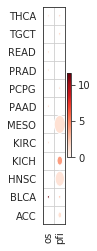

In [174]:
grid=total_plot.pivot(index="cancer", columns="cat",values=0)
c=total_plot.pivot(index="cancer", columns="cat",values="-log10(fdr)")

grid=grid.fillna(0)
c=c.fillna(0)

for x in c.columns:
    c[x]=pd.to_numeric(c[x])

ylabels = grid.index.tolist()
xlabels = grid.columns.tolist()
N=len(ylabels)
M=len(xlabels)

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = grid.values
c = c.values

fig, ax = plt.subplots(figsize=(0.5, 4))

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="Reds")
ax.add_collection(col)

ax.set(xticks=np.arange(len(xlabels)), yticks=np.arange(len(ylabels)),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')
plt.xticks(rotation=90)

fig.colorbar(col)
plt.savefig("../plots/prognostic.snps.pdf")


In [175]:
total_plot

,cancer,-log10(fdr),0,cat
0,ACC,1.478851,2,pfi
1,BLCA,3.518637,1,pfi
2,HNSC,1.228315,5,pfi
3,KICH,3.959526,3,pfi
4,MESO,1.408907,6,pfi
5,PCPG,1.974432,1,pfi
6,TGCT,2.687928,1,pfi
7,THCA,2.467671,1,pfi
8,BLCA,11.527522,1,os
9,KIRC,1.465100,1,os
